# Predicting Blood Donor Retention 

## Problem Statement   
   Blood Donor retention is a problem facing the medical community. Someone may donate blood once, perhaps during a natural disaster, or at a random blood drive. However, some people might donate blood on a regular basis. These trends produce irragularities in blood supply. 
   Using previous Blood Donation Data, we can begin to predict the probability of an individual returning to donate blood within a calendar year. This can result in consistent blood supply and advise mobile blood clinics where to target in order to receive a high volume of donations. 

## Data Dictionary   

This data set was originally posted on the UCI Machine Learning Repository, and recently made available as a Data Science Competition on DriveData.org. Data was collected by the Blood Transfusion Service Center of Taiwan. This organization arranges mobile blood donation sites on college campuses. 

Variable Name | Data Type | Type of Variable 
--- | --- | --- |    
Identifier | Integer (random number) | 
Month Since last Donation | Integer | Continous 
Number of Donations | Integer | Continous
Total Volume Donated (c.c) | Integer | Continous
Month's since first donation | Integer | Continous
Made donations in March 2007 | Integer | Categorical (already assigned dummy)

## Aim | Predict whether or not individual will return to donate blood in March 2007  
Independent Variables (predictors) = Month's since last donation, number of donations, TV donated, Months since first donation 


Dependent Variable (outcome) = Did the return to make a donation in March of 2007 (0 = no, 1 = yes) 

# Reading in the Data 

In [257]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns     
import pylab as pl 
import statsmodels.api as sm 
import seaborn as sn

In [258]:
import os 
os.chdir('/Users/clintonholler/Desktop/DataSets') 

In [259]:
df = pd.read_csv('bloodtrain.csv')

The current Dataframe below is the showing the test data. The dependent variable column (made donation in March 2007), will be missing from the test data

In [260]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


The unnamed column will be dropped, it a unique identifier of donor, and not a necessary value.    

In [261]:
 df = df.drop('Unnamed: 0', 1)

In [262]:
#See if it worked
df.head(1)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1


Determining overall size of dataset and if there are any missing values. 

In [263]:
df.count()

Months since Last Donation     576
Number of Donations            576
Total Volume Donated (c.c.)    576
Months since First Donation    576
Made Donation in March 2007    576
dtype: int64

In [264]:
df.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

There is no missing data in our training dataset. 

# Reading in test data

In [265]:
dftest = pd.read_csv('bloodactual.csv')

In [266]:
dftest.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


As stated earlier, the column containing "Made Donation in March 2007" is missing from the test data.

## Initial analysis of training data

In [267]:
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


The average time between months of donation is 9.4 months. It is good to see that this average is above 1.8, because that is the amount of time that an individual must wait to donate blood once again. This prevents at least one anomaly. 

In the test data, we can also see that on average, people have been donating blood for almost 3 (2.8 years).  

On average, people have donated blood 5 times. 


# Determining best predictors for our outcome

In [268]:
df.corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


The strongest correlative value to our dependent variable is Number of Donations. 

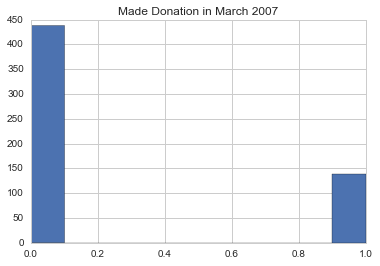

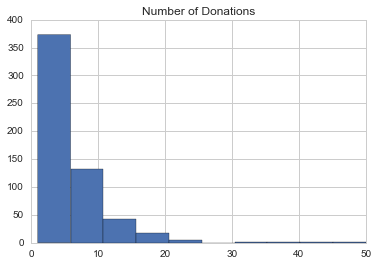

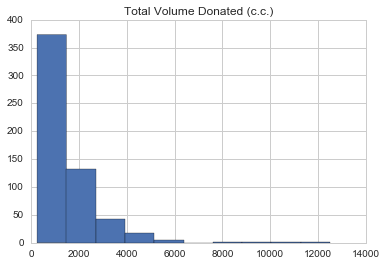

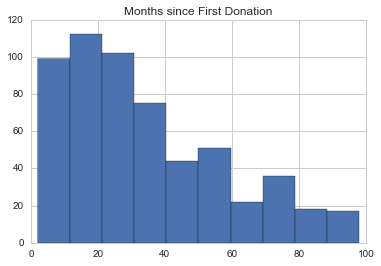

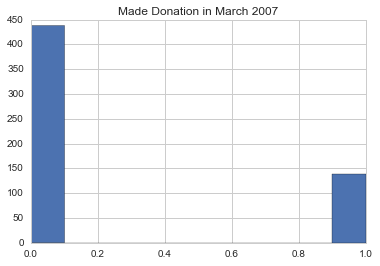

In [269]:
df.hist('Made Donation in March 2007') 
df.hist('Number of Donations')
df.hist('Total Volume Donated (c.c.)') 
df.hist('Months since First Donation') 
df.hist('Made Donation in March 2007')
pl.show() 

These histograms help provide a visual representation of the distribution of values for each variable.

# Using scatter plot to identify correlation between predictors and outcomes

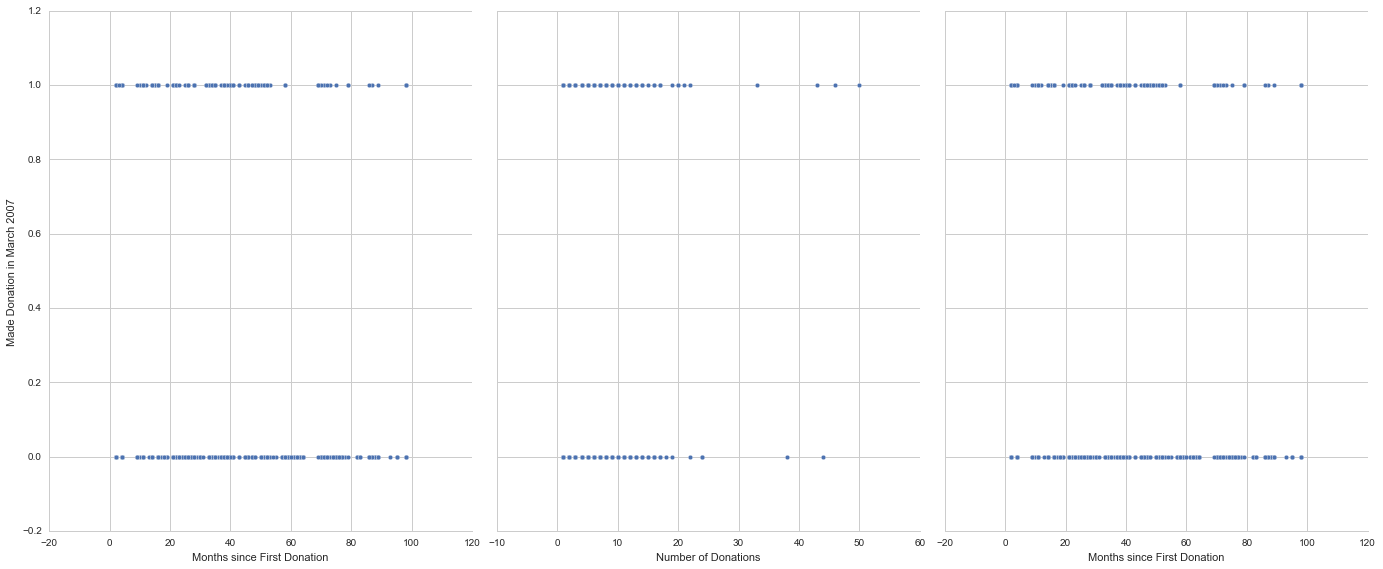

In [270]:
sns.pairplot(df, x_vars=['Months since First Donation', 'Number of Donations', 'Months since First Donation'],
            y_vars=['Made Donation in March 2007'], size=8, aspect=0.8)


Scatter plots do not provide the best visualization of the data, so let's try box plot. 

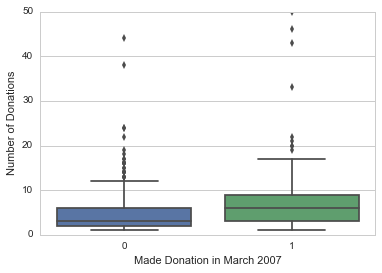

In [271]:
ax = sns.boxplot(x="Made Donation in March 2007", y="Number of Donations", data=df)  

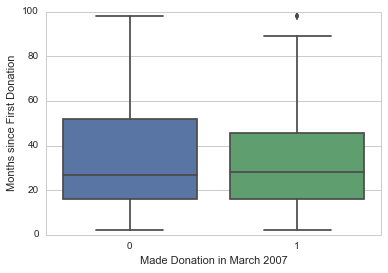

In [272]:
ax = sns.boxplot(x="Made Donation in March 2007", y="Months since First Donation", data=df)

For a binary out come (0 = did not donate blood in March 2007, 1 = did donate blood in 2007), box plots help us better visualize relationships among variables. In the above 2 box plots, we can see that as we increase the overall number of donations, the return in March 2007 value increases. We can also see that the longer it has been since an individuals first donation, they are less likely to return to donate blood in March 2007. 

# Initial Logistic Regression 
Again, we are trying to predict if an individual will return to donate blood in March 2007. Therefore, we can use a logistic regression model to predict our y value. This model is effective because it can accept a large number of covariates, or a single covariate, to predict the final y value. 

In [273]:
train_cols = df.columns[0:4]  
# Index ([Months since last donation, Number of donations, Total volume donated, Months since first donation]  
logit = sm.Logit(df['Made Donation in March 2007'], df[train_cols])

result = logit.fit()

         Current function value: 0.490646
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The above warning has happened each time I have run the logistic regression. Not really sure why, however, it does return a y value, and it is not very good. 

In [274]:
print result.summary()

                                Logit Regression Results                               
Dep. Variable:     Made Donation in March 2007   No. Observations:                  576
Model:                                   Logit   Df Residuals:                      573
Method:                                    MLE   Df Model:                            2
Date:                         Thu, 26 May 2016   Pseudo R-squ.:                  0.1089
Time:                                 19:02:35   Log-Likelihood:                -282.61
converged:                               False   LL-Null:                       -317.15
                                                 LLR p-value:                 1.006e-15
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Months since Last Donation     -0.1196      0.017     -7.090      0.000        -0.153    -0.087
Number o

Based off of this initial logistic regression, every predictor has a negative influence on our Y outcome. 

# Running the logistic regression with different predictors

In [275]:
train_cols2 = df.columns[1] 
# Index ([Number of Donations])
  
logit2 = sm.Logit(df['Made Donation in March 2007'], df[train_cols2])

result = logit2.fit()


Optimization terminated successfully.
         Current function value: 0.666403
         Iterations 5


We increase the y value to .67 when we just us the total number of donations as our predictor

In [276]:
print result.summary()

                                Logit Regression Results                               
Dep. Variable:     Made Donation in March 2007   No. Observations:                  576
Model:                                   Logit   Df Residuals:                      575
Method:                                    MLE   Df Model:                            0
Date:                         Thu, 26 May 2016   Pseudo R-squ.:                 -0.2103
Time:                                 19:02:35   Log-Likelihood:                -383.85
converged:                                True   LL-Null:                       -317.15
                                                 LLR p-value:                       nan
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Number of Donations    -0.0664      0.013     -5.056      0.000        -0.092    -0.041


In [277]:
print np.exp(result.params)

Number of Donations    0.935741
dtype: float64


In [278]:
train_cols3 = df.columns[0:1]
# Index ([Months since last donation, Number of donations])

logit3 = sm.Logit(df['Made Donation in March 2007'], df[train_cols3]) 

result = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.508684
         Iterations 6


When Months since last donation and number of donations are used are the predictors, we decrease out y outcome. 

# How does a logistic regression in scikit learn effect our outcome?

In [279]:
from sklearn.linear_model import LogisticRegression 
lm = LogisticRegression()

In [300]:
from sklearn.cross_validation import KFold

Not using Total Volume donated, since the max number an individual can donate at one time is 1 pint. 

In [301]:
lm.fit(df[['Number of Donations', 'Months since Last Donation', 'Months since First Donation']], 
       df['Made Donation in March 2007']) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [302]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)

[[ 1.13764164  0.91194996  0.98121949]]
[ 0.57064169]


When the logistic regression is run in scikit learn, our coefficient values are significantly better. 

In [303]:
lm.fit(df[['Number of Donations']], 
      df['Made Donation in March 2007'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [304]:
print np.exp(lm.coef_) 
print np.exp(lm.intercept_)

[[ 1.08269132]]
[ 0.20125319]


# What would a Random Forest Classifier tell us about our predictors? 

In [305]:
X = df[['Number of Donations', 'Months since Last Donation', 'Months since First Donation']]
y = df[['Made Donation in March 2007']]

In [306]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)

model.fit(X, y)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [307]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False) 

features_df

,Features,Importance Score
2,Months since First Donation,0.428467
0,Number of Donations,0.297310
1,Months since Last Donation,0.274223


The random forest classifier marks Months since First Donation and Number of Donations as the most important features in our problem. Let's apply our logistic regression with these two predictors and see our outcome. 

In [308]:
lm.fit(df[['Number of Donations', 'Months since First Donation']], 
       df['Made Donation in March 2007'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [309]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_) 

[[ 1.19338795  0.96868443]]
[ 0.3289361]


# We have our predictors!: Number of Donations and Months since First Donation

With each unit increase in Months since First Donation and Number of Donations increases the odds of returning to make a donation in March of 2007. Lets run a logistic regression in statsmodel to see our Y output value. 

The Drivendata competition provides a test test data set in which we call a prediction for our y value, which is shown below. 

# Next Steps

The initial data exploration of this project was insightful, however, there are more steps to be taken. The first next steps would be to actually evaluate the model and determine how well the predictors actually worked with our logistic regression. As you can, I made attempts at this, but ran into several errors and problems. 

I learned that even though my dataset was small, it still comes with its problems. My coefficients varied from when I used statsmodel to scikit learn. My y value never got above .67, and my final y_predict on the test data (Scroll to the bottom to see!!!!), was successful in terms of developing an array of predictions, but I have not yet assessed the accuracy or precision of these predictions. 

Over the coming weeks, I plan on diving more into model evaluation and assess the accuracy and precision of my y_predict values. 


To Data Science! 

# Evaluating the model

Parameter grid range is really flexible...

In [310]:
from sklearn import grid_search, cross_validation 

feature_set = df[['Number of Donations', 'Months since Last Donation', 'Months since First Donation']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(df), n_folds=10), 
    scoring='roc_auc'
) 

gs.fit(feature_set, df['Made Donation in March 2007'])
gs.grid_scores_

//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto'

[mean: 0.52138, std: 0.16992, params: {'C': 100000, 'class_weight': None},
 mean: 0.52145, std: 0.17896, params: {'C': 100000, 'class_weight': 'auto'},
 mean: 0.52138, std: 0.16992, params: {'C': 10000, 'class_weight': None},
 mean: 0.52145, std: 0.17896, params: {'C': 10000, 'class_weight': 'auto'},
 mean: 0.52138, std: 0.16992, params: {'C': 1000, 'class_weight': None},
 mean: 0.52145, std: 0.17896, params: {'C': 1000, 'class_weight': 'auto'},
 mean: 0.52138, std: 0.16992, params: {'C': 100, 'class_weight': None},
 mean: 0.52145, std: 0.17896, params: {'C': 100, 'class_weight': 'auto'},
 mean: 0.52079, std: 0.17041, params: {'C': 10, 'class_weight': None},
 mean: 0.52112, std: 0.17910, params: {'C': 10, 'class_weight': 'auto'},
 mean: 0.52000, std: 0.16551, params: {'C': 1, 'class_weight': None},
 mean: 0.52379, std: 0.17843, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.51171, std: 0.15766, params: {'C': 0.1, 'class_weight': None},
 mean: 0.52672, std: 0.17895, params: {'C': 0.

In [312]:
cv = KFold(len(X3_market), n_folds=5, shuffle=False)
scores = cross_val_score(model20, X3_market, y_market, scoring='roc_auc', cv=cv)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

NameError: name 'X3_market' is not defined

In [313]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print scores

IndexError: too many indices for array

In [314]:
print gs.best_params_

{'C': 0.0001, 'class_weight': 'auto'}


In [315]:
from sklearn.cross_validation import cross_val_score 

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean())) 

for n_trees in range(1, 100, 10): 
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC{}'.format(n_trees, scores, scores.mean()))

IndexError: too many indices for array

In [316]:

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))  

plt.plot(scores)

IndexError: too many indices for array

In [317]:
y_pred = lm.predict(dftest[['Number of Donations', 'Months since Last Donation']])
print y_pred

[1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]


What is default cut off value to make it 0 or 1?